In [1]:
import numpy as np
import pandas as pd
import sklearn.gaussian_process as gp
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OneHotEncoder
from numpy.random import RandomState

from util.defs import ParamType
from util.util import random_x_sample
from acquisition.acquisition_functions import ProbabilityOfImprovement, ExpectedImprovement
from acquisition.acquisition_optimizers import RandomAcquisitionOpt, ConstrainedAcquisitionOpt
from hp_optimizers.hp_optimizer import GPROptimizer, RandomSearchOptimizer

# Set random seed

In [2]:
rand = RandomState(seed=123)

# Grab the dataset

In [3]:
income = "../data/income.csv"
df = pd.read_csv(income)
data = df.values
rand.shuffle(data)
X = data[:, :-1]
y = data[:, -1]

In [4]:
print(data.shape)
print(df.shape)


(30162, 105)
(30162, 105)


# Define: bounds for hyperparameters, parameter data types, objective function (lower is better)

In [5]:
# x0 = num layers [>1]
# x1 = learning rate init [0-1]
# x2 = alpha [0-1]
# x3 = beta1 [0-1]
# x4 = beta2 [0-1]
bounds = np.array([
    [2, 100],
    [0.001, 1 - 0.001],
    [0, 0.5],
    [0.8, 1 - 0.000001],
    [0.8, 1 - 0.000001]
])

p_types = [ParamType.Disc, ParamType.Cont, ParamType.Cont, ParamType.Cont, ParamType.Cont]

def objective(x):
    # x may be passed as a (1, p) array
    if x.ndim > 1:
        x = x[0]
    # define model
    model = MLPClassifier(hidden_layer_sizes=int(x[0]),
                          learning_rate_init=x[1],
                          alpha=x[2],
                          random_state=rand,
                          max_iter = 100
                         )

    # get 5-fold cross validation results
    cv_res = cross_validate(model, X, y, cv=5)
    # return 1 - acc
    return 1 - cv_res["test_score"].mean()

# Define the Bayesian Optimizer

In [6]:
kernel = gp.kernels.RBF()
gpr = gp.GaussianProcessRegressor(kernel,
                                  alpha=1,
                                  #alpha=np.abs(rand.normal(scale=.1)),
                                  #alpha=np.abs(rand.normal(scale=.01)),
                                  n_restarts_optimizer=15, 
                                  random_state=rand)
acquisition = ExpectedImprovement()
# acquisition = ProbabilityOfImprovement()
opt_acquisition = ConstrainedAcquisitionOpt(gpr, acquisition, rand)
gpr_opt = GPROptimizer(gpr, opt_acquisition, objective, bounds, p_types, rand, initial_samples=5, fit=True)

/home/brendan/anaconda/envs/cs446-gp-env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/brendan/anaconda/envs/cs446-gp-env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/brendan/anaconda/envs/cs446-gp-env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/brendan/anaconda/envs/cs446-gp-env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimi

# Run the optimization

In [7]:
res1 = gpr_opt.optimize(10, thresh=0.03, verbose=True)
print(gpr_opt.X)
print(gpr_opt.y)

Optimization iteration 1
Selected next parameter sample from acquisition optimizer: [52.          0.0652796   0.08261837  0.85587945  0.82254461]
Objective value at sample: 0.2324

Optimization iteration 2
Selected next parameter sample from acquisition optimizer: [41.          0.8265282   0.35557237  0.8995825   0.90319067]
Objective value at sample: 0.2489

Optimization iteration 3
Selected next parameter sample from acquisition optimizer: [58.          0.68900178  0.40606549  0.87973998  0.93512953]
Objective value at sample: 0.2489

Optimization iteration 4
Selected next parameter sample from acquisition optimizer: [55.          0.82733082  0.3106979   0.82060693  0.92032097]


/home/brendan/anaconda/envs/cs446-gp-env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/brendan/anaconda/envs/cs446-gp-env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/brendan/anaconda/envs/cs446-gp-env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Objective value at sample: 0.2489

Optimization iteration 5
Selected next parameter sample from acquisition optimizer: [45.          0.15182052  0.358009    0.81888255  0.9530352 ]


/home/brendan/anaconda/envs/cs446-gp-env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/brendan/anaconda/envs/cs446-gp-env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Objective value at sample: 0.2488

Optimization iteration 6
Selected next parameter sample from acquisition optimizer: [49.          0.51419324  0.20609344  0.83052969  0.85087248]
Objective value at sample: 0.2489

Optimization iteration 7
Selected next parameter sample from acquisition optimizer: [44.          0.30167059  0.10386044  0.96746831  0.95148817]
Objective value at sample: 0.2481

Optimization iteration 8
Selected next parameter sample from acquisition optimizer: [34.          0.18805364  0.0699982   0.95518401  0.87488658]


/home/brendan/anaconda/envs/cs446-gp-env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/brendan/anaconda/envs/cs446-gp-env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/brendan/anaconda/envs/cs446-gp-env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Objective value at sample: 0.2489

Optimization iteration 9
Selected next parameter sample from acquisition optimizer: [45.          0.89169781  0.25672661  0.87439245  0.97038304]


/home/brendan/anaconda/envs/cs446-gp-env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/brendan/anaconda/envs/cs446-gp-env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/brendan/anaconda/envs/cs446-gp-env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Objective value at sample: 0.2489

Optimization iteration 10
Selected next parameter sample from acquisition optimizer: [34.          0.86705386  0.21066185  0.88127797  0.8816396 ]


/home/brendan/anaconda/envs/cs446-gp-env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/brendan/anaconda/envs/cs446-gp-env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/brendan/anaconda/envs/cs446-gp-env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Objective value at sample: 0.2489

Optimization yielded: {'argmin': 0, 'minimizer': array([2.00000000e+01, 1.05154652e-02, 1.97165282e-01, 8.07757167e-01,
       8.23545815e-01]), 'minimum': array([0.20051745])}
[[2.00000000e+01 1.05154652e-02 1.97165282e-01 8.07757167e-01
  8.23545815e-01]
 [4.90000000e+01 9.33537776e-02 4.46793769e-01 9.45403253e-01
  8.68260928e-01]
 [2.30000000e+01 6.03212030e-01 8.21767003e-02 9.99371451e-01
  8.62532700e-01]
 [1.70000000e+01 1.60908439e-01 3.66487224e-01 9.42870086e-01
  9.86418765e-01]
 [8.80000000e+01 4.06138809e-02 1.96274547e-01 8.49808951e-01
  8.36057863e-01]
 [5.20000000e+01 6.52795981e-02 8.26183689e-02 8.55879453e-01
  8.22544612e-01]
 [4.10000000e+01 8.26528197e-01 3.55572366e-01 8.99582496e-01
  9.03190668e-01]
 [5.80000000e+01 6.89001780e-01 4.06065489e-01 8.79739980e-01
  9.35129529e-01]
 [5.50000000e+01 8.27330820e-01 3.10697899e-01 8.20606931e-01
  9.20320967e-01]
 [4.50000000e+01 1.51820522e-01 3.58009001e-01 8.18882549e-01
  9.53

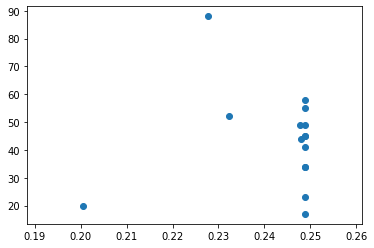

In [8]:
import matplotlib.pyplot as plt
plt.scatter(gpr_opt.y, gpr_opt.X[:,0])


# Try Random Search for comparison

In [ ]:
rand_opt = RandomSearchOptimizer(objective, bounds, p_types, rand, parallel=False)
res2 = rand_opt.optimize(13, verbose=False)
res2

/home/brendan/anaconda/envs/cs446-gp-env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/brendan/anaconda/envs/cs446-gp-env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/brendan/anaconda/envs/cs446-gp-env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/brendan/anaconda/envs/cs446-gp-env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimi